In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
# Carga el dataset en un DataFrame de pandas
data = pd.read_csv("./winequality-red.csv")


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


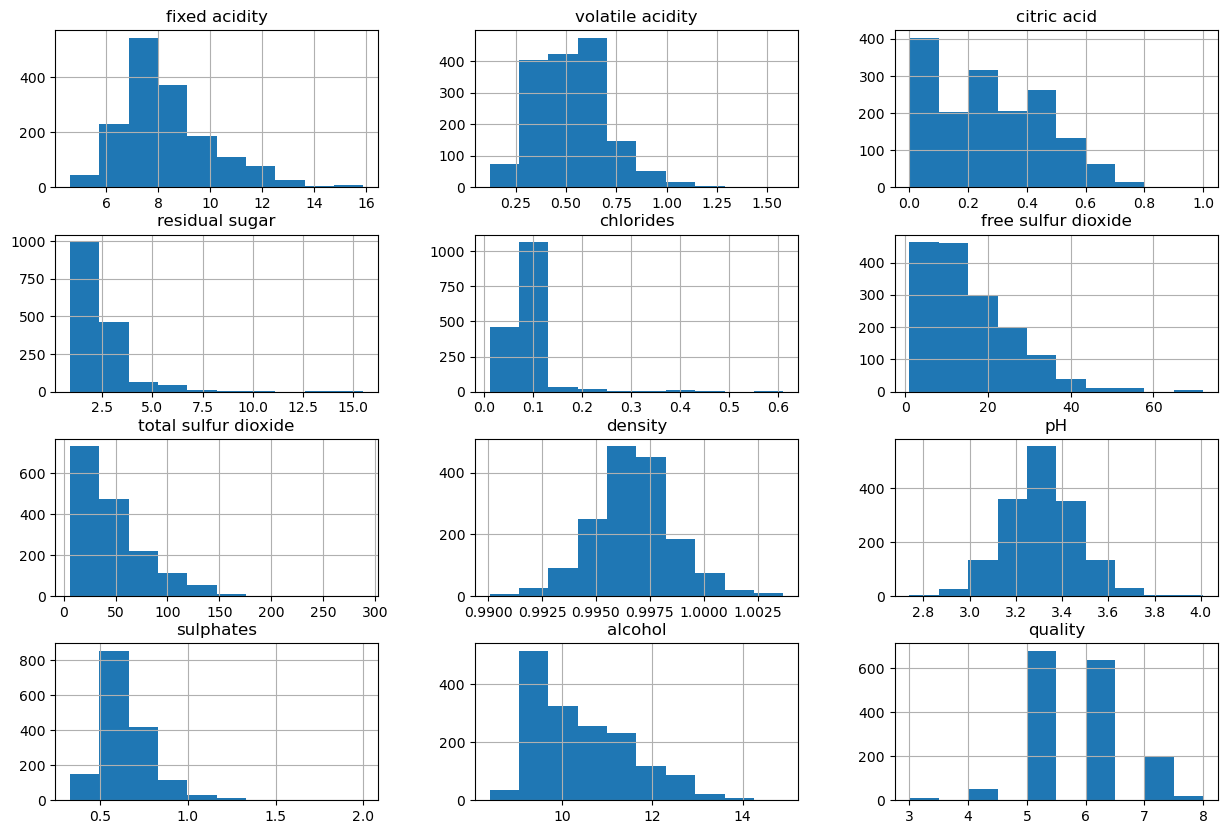

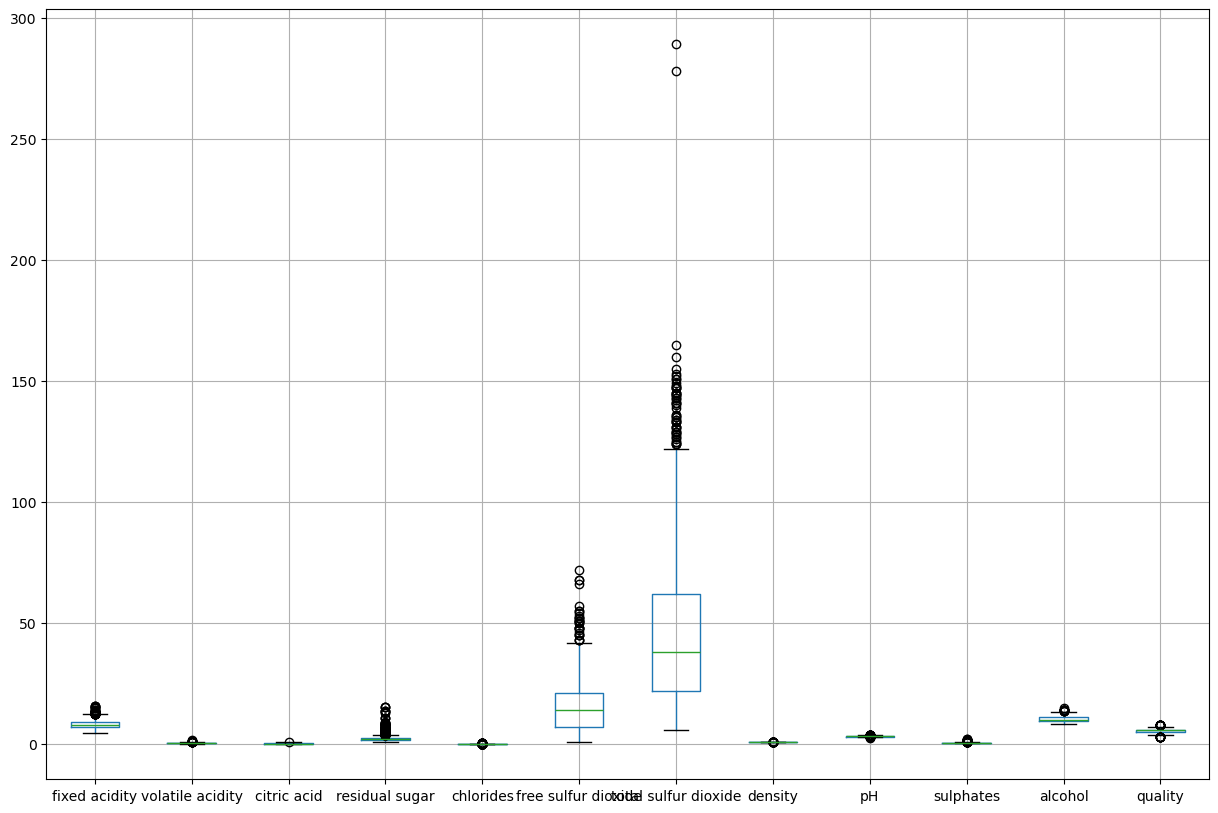

In [6]:
data.hist(figsize=(15, 10))
plt.show()

data.boxplot(figsize=(15, 10))
plt.show()


In [7]:
# Z-scores
zscores = np.abs(data[data.select_dtypes(include=[np.number]).columns] - data[data.select_dtypes(include=[np.number]).columns].mean()) / data[data.select_dtypes(include=[np.number]).columns].std()

# Marcar valores atípicos como True
outliers = zscores > 3

# Imprimir el número de valores atípicos por variable
print(outliers.sum(axis=0))


fixed acidity           12
volatile acidity        10
citric acid              1
residual sugar          30
chlorides               31
free sulfur dioxide     22
total sulfur dioxide    15
density                 18
pH                       8
sulphates               27
alcohol                  8
quality                 10
dtype: int64


In [8]:
data["quality"].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
correlation_matrix = data[data.select_dtypes(include=[np.number]).columns].corr()
print(correlation_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

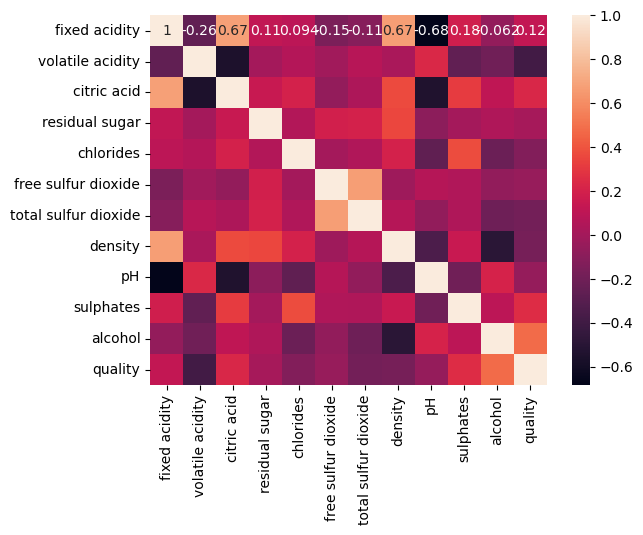

In [10]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()


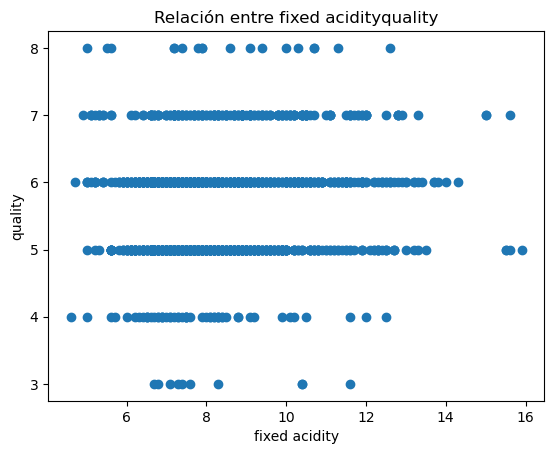

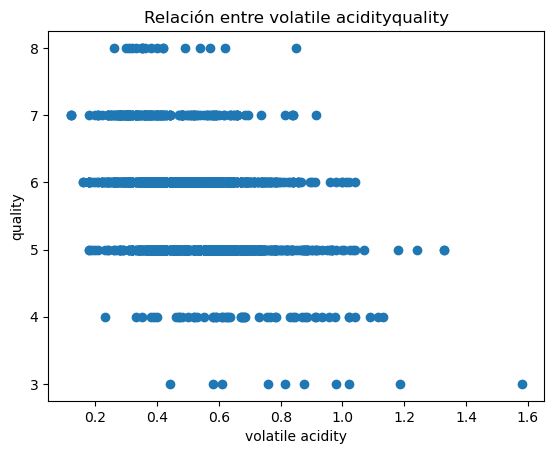

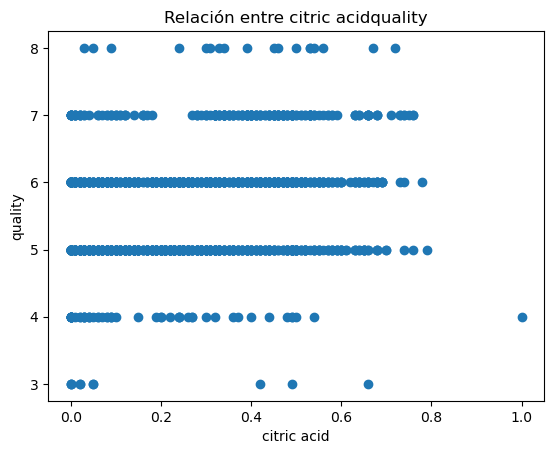

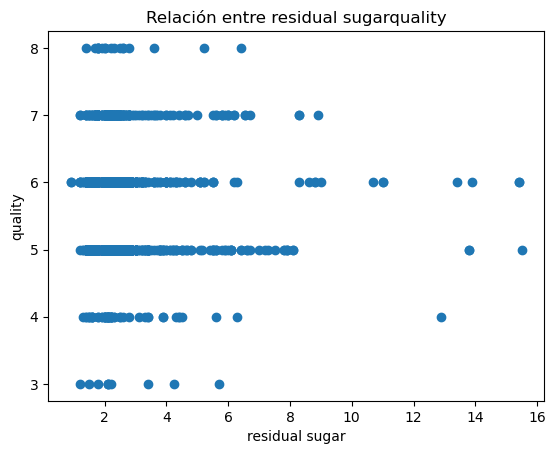

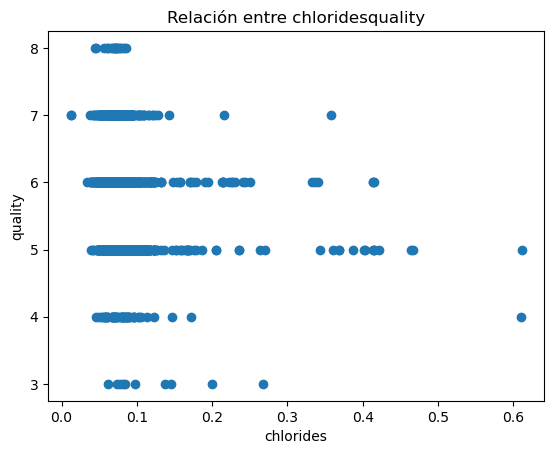

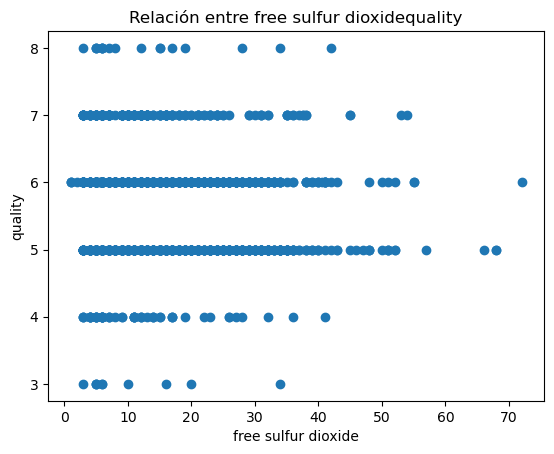

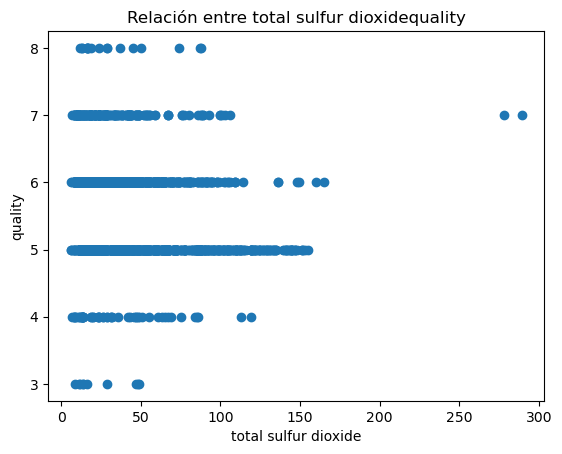

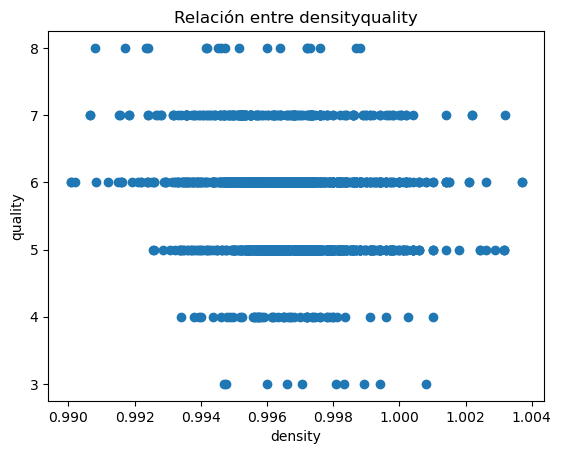

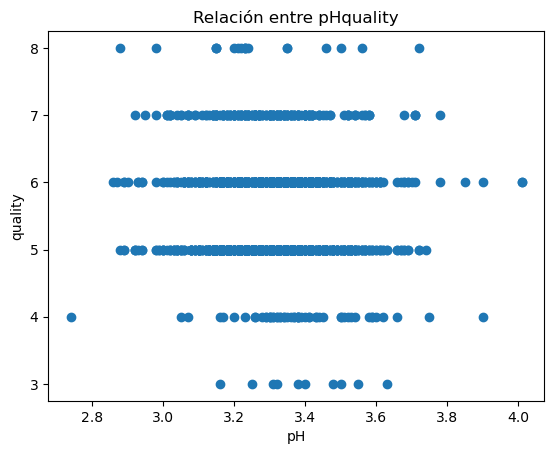

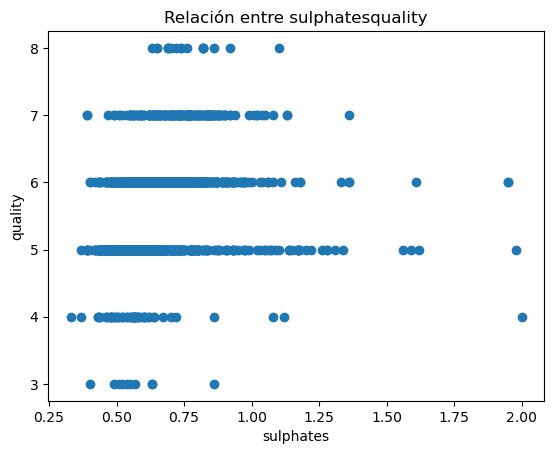

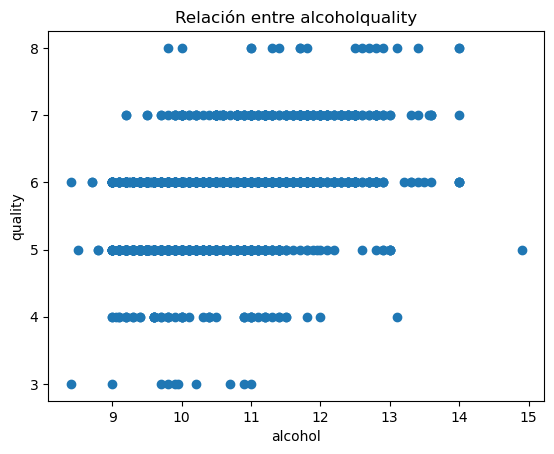

In [11]:
for col in data.select_dtypes(include=[np.number]).columns:
    if col != "quality":
        plt.scatter(data[col], data["quality"])
        plt.xlabel(col)
        plt.ylabel("quality")
        plt.title(f"Relación entre {col}quality")
        plt.show()


In [12]:
missing_values = data.isna().sum()
print(missing_values)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
data.dropna(inplace=True)


In [14]:
data[data["quality"].isna()]["quality"] = data["quality"].mean()


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
data[data.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(data[data.select_dtypes(include=[np.number]).columns])


In [18]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)